# Task 1: EDA and Visualization of a Real-World Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
file_path = "C:/Users/PMLS/Desktop/All desktop things/DS internship/Airbnb_Open_Data.csv"
df = pd.read_csv(file_path)

C:\Windows\Temp\ipykernel_14816\2851432627.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [6]:
print("Dataset Overview:")
print(df.head())
print(df.tail())

Dataset Overview:
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -7

In [7]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000 

In [8]:
print("\nDataset Dimensions:", df.shape)



Dataset Dimensions: (102599, 26)


In [9]:
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365        

C:\Windows\Temp\ipykernel_14816\2792758290.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [10]:
#outliers detection
z_scores = stats.zscore(df[numeric_columns])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_counts = outliers.sum()
print("\nOutliers Count Per Column:")
print(outlier_counts)


Outliers Count Per Column:
id                                   0
host id                              0
lat                                217
long                              2745
Construction year                    0
minimum nights                     416
number of reviews                 2386
reviews per month                 1410
review rate number                   0
calculated host listings count    1809
availability 365                     1
dtype: int64


In [11]:
df['price'] = df['price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].fillna(df['price'].median(), inplace=True)

C:\Windows\Temp\ipykernel_14816\3271598111.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)


In [12]:
# Select only numeric columns to reduce memory usage
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Ensure "review rate number" is numeric and contains only finite values
df_numeric["review rate number"] = pd.to_numeric(df_numeric["review rate number"], errors='coerce')
df_cleaned = df_numeric[df_numeric["review rate number"].notna() & np.isfinite(df_numeric["review rate number"])]


C:\Windows\Temp\ipykernel_14816\4227030985.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["review rate number"] = pd.to_numeric(df_numeric["review rate number"], errors='coerce')


In [13]:
# Sample a suitable portion of the dataset to optimize memory usage
sample_fraction = 0.20  # Using 35% of the data for better balance
df = df.sample(frac=sample_fraction, random_state=42)

In [14]:
# Visualization
sns.set_style("whitegrid")

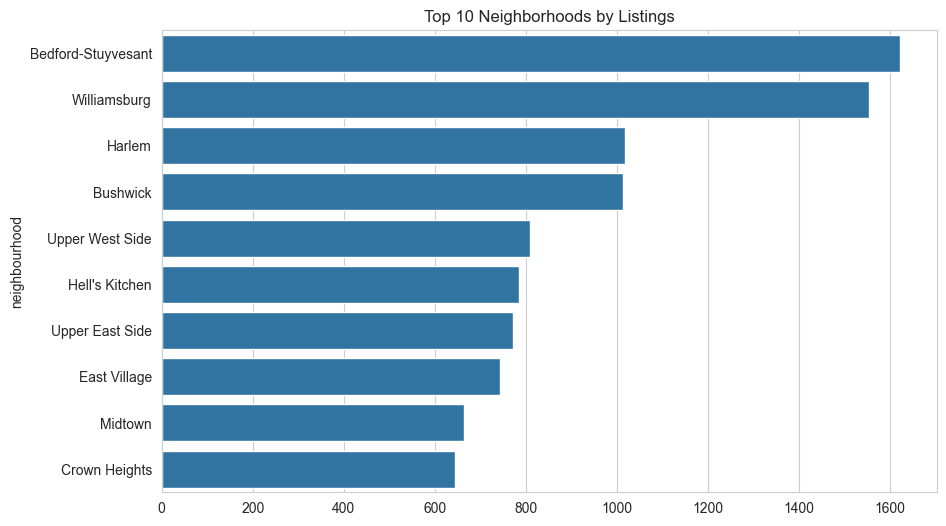

In [15]:
# 1. Bar Plot - Top 10 Neighborhoods
plt.figure(figsize=(10,6))
sns.barplot(x=df["neighbourhood"].value_counts().head(10).values, 
            y=df["neighbourhood"].value_counts().head(10).index)
plt.title("Top 10 Neighborhoods by Listings")
plt.show()


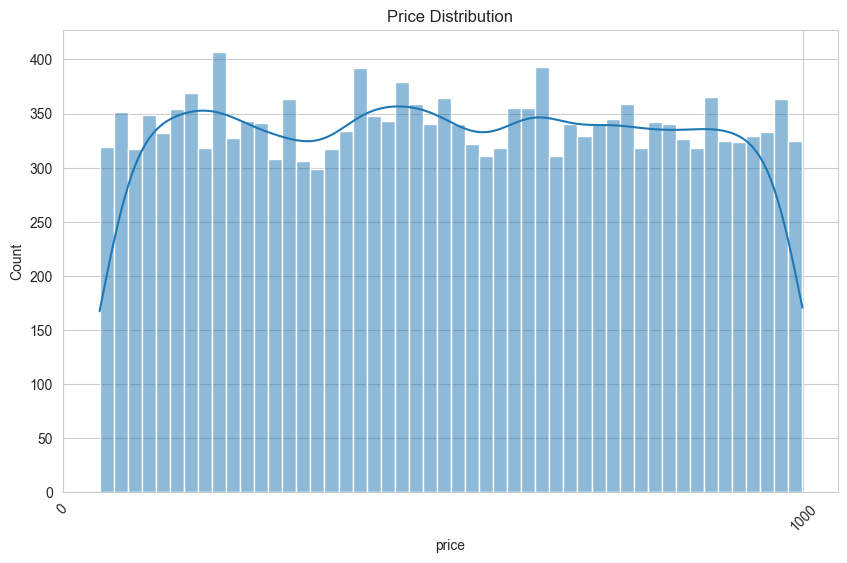

In [16]:
# 2. Histogram - Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df[df['price'] < 1000]["price"], bins=50, kde=True)
plt.xticks(rotation=45)
plt.gca().set_xticks(plt.gca().get_xticks()[::5])
plt.title("Price Distribution")
plt.show()



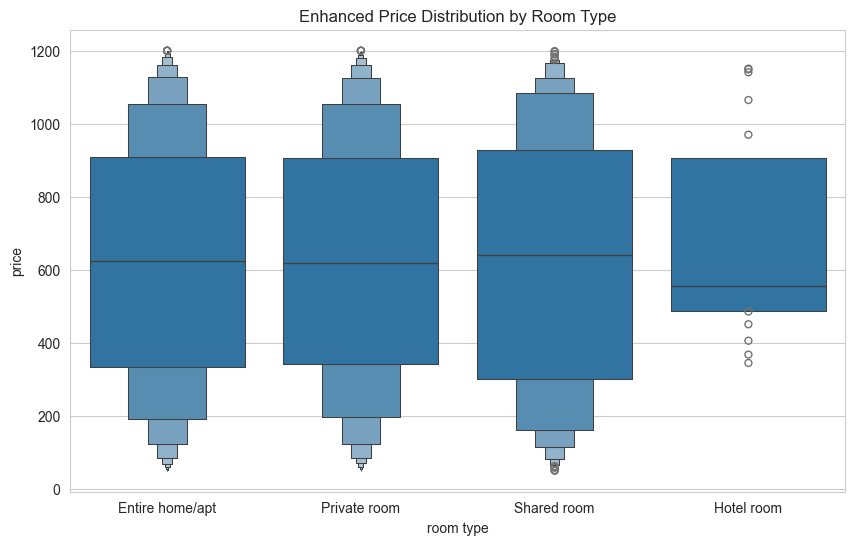

In [17]:
# 3. Boxen Plot - Price Distribution by Room Type
plt.figure(figsize=(10,6))
sns.boxenplot(x=df["room type"], y=df["price"])
plt.title("Enhanced Price Distribution by Room Type")
plt.show()

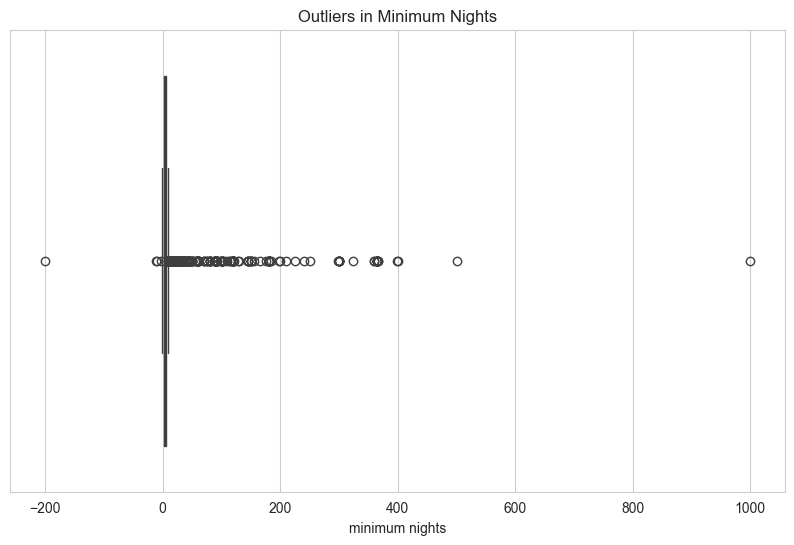

In [18]:
# 4. Box Plot - Minimum Nights Outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df["minimum nights"])
plt.title("Outliers in Minimum Nights")
plt.show()


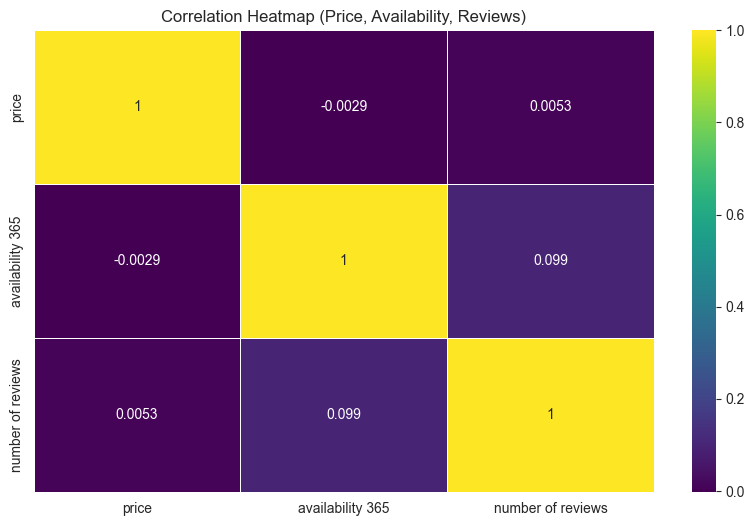

In [19]:
# 5. Correlation Heatmap - Selected Variables
selected_corr = df_numeric[['price', 'availability 365', 'number of reviews']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(selected_corr, cmap="viridis", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap (Price, Availability, Reviews)")
plt.show()

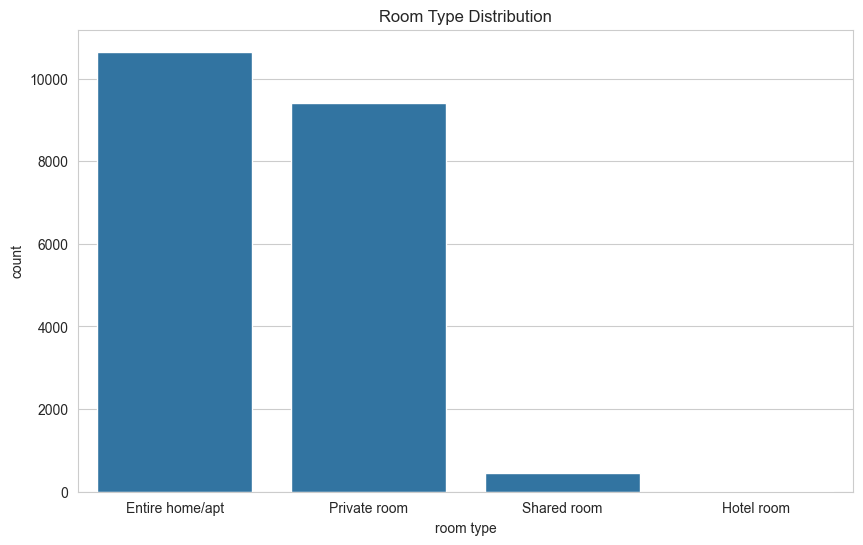

In [20]:
# 6. Count Plot - Room Type Distribution
plt.figure(figsize=(10,6))
sns.countplot(x=df["room type"])
plt.title("Room Type Distribution")
plt.show()

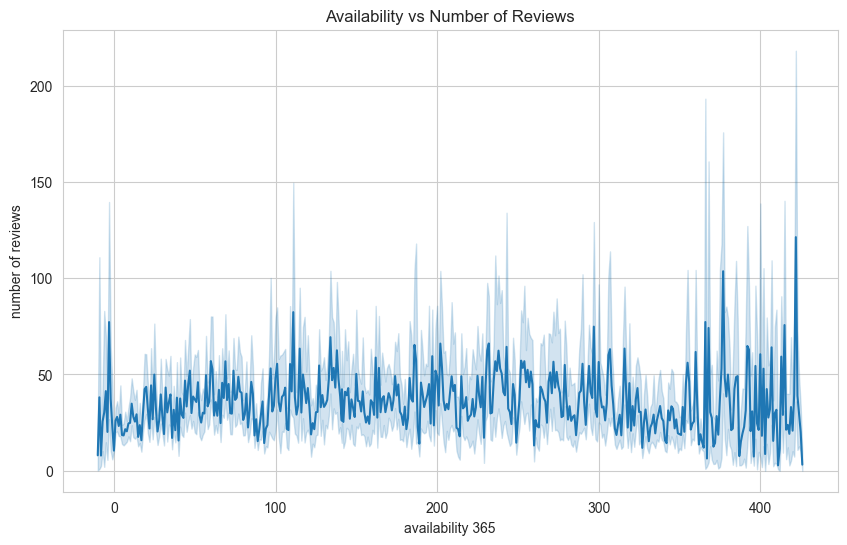

In [21]:
# 7. Line Plot - Availability vs Number of Reviews
plt.figure(figsize=(10,6))
sns.lineplot(x=df["availability 365"], y=df["number of reviews"])
plt.title("Availability vs Number of Reviews")
plt.show()

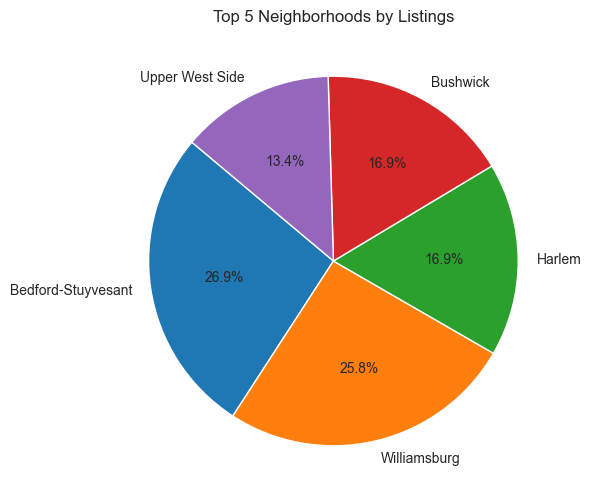

In [23]:
# 9. Pie Chart - Top 5 Neighborhoods by Listings
plt.figure(figsize=(10,6))
top_5_neighborhoods = df["neighbourhood"].value_counts().head(5)
plt.pie(top_5_neighborhoods.values, labels=top_5_neighborhoods.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Neighborhoods by Listings")
plt.show()

C:\Windows\Temp\ipykernel_17996\1150851540.py:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb = pd.read_csv(r'C:\Users\PMLS\Desktop\All desktop things\DS internship\Airbnb_Open_Data.csv')


        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United St

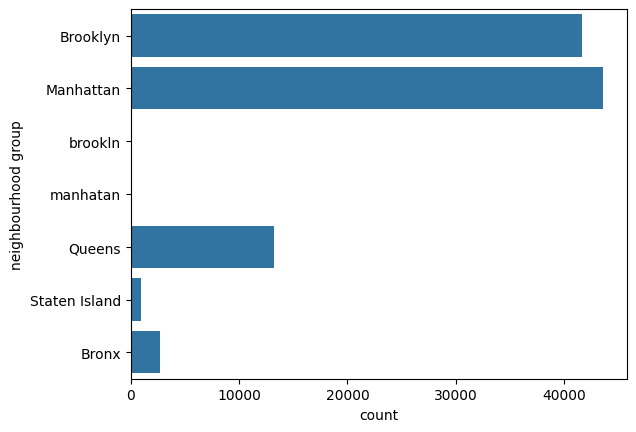

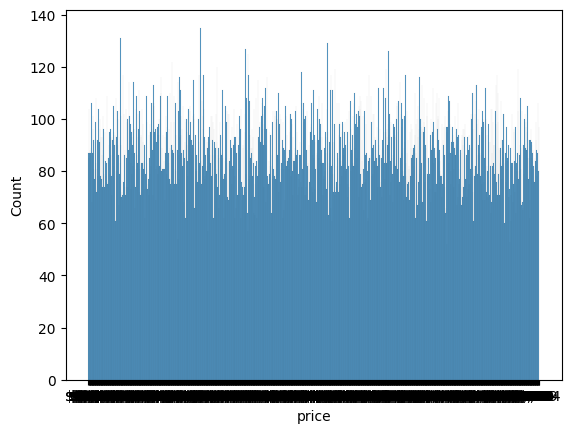

ValueError: could not convert string to float: '$966 '

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_airbnb = pd.read_csv(r'C:\Users\PMLS\Desktop\All desktop things\DS internship\Airbnb_Open_Data.csv')

print(df_airbnb.head())
print(df_airbnb.tail())
print("Dimensions:", df_airbnb.shape)
print("Missing values:\n", df_airbnb.isnull().sum())

df_airbnb.drop_duplicates(inplace=True)
df_airbnb.fillna({
    'reviews per month': 0,
    'host_identity_verified': 'unconfirmed',
    'name': 'Unknown',
    'license': 'Not Provided'
}, inplace=True)

sns.countplot(y='neighbourhood group', data=df_airbnb)
plt.show()

sns.histplot(df_airbnb['price'].dropna(), bins=50)
plt.show()

sns.heatmap(df_airbnb[['price', 'minimum nights', 'number of reviews', 'availability 365']].corr(), annot=True)
plt.show()
